<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](mlcourse.ai) – Open Machine Learning Course 
### <center> Author: Andrei Rem, Andr Rem
    
## <center> Individual data analysis project
### <center> Daily Happiness & Employee Turnover

**Research plan**

[Part 1. Dataset and task explanation](#part1)<br>

[Part 2. Сomplete raw data analysis](#part2)<br>

[Part 2.1. Churn](#part2.1)<br>
[Part 2.1.1. Churn. Dataset and features description](#part2.1.1)<br>
[Part 2.1.2. Churn. Exploratory data analysis, visual analysis of the features](#part2.1.2)<br>
[Part 2.1.3. Churn. Patterns, insights, pecularities of data](#part2.1.3)<br>

[Part 2.2. Votes](#part2.2)<br>
[Part 2.2.1. Votes. Dataset and features description](#part2.2.1)<br>
[Part 2.2.2. Votes. Exploratory data analysis, visual analysis of the features](#part2.2.2)<br>
[Part 2.2.3. Votes. Patterns, insights, pecularities of data](#part2.2.3)<br>

[Part 2.3. Anonimized clean comments](#part2.3)<br>
[Part 2.3.1. Anonimized clean comments. Dataset and features description](#part2.3.1)<br>
[Part 2.3.2. Anonimized clean comments. Exploratory data analysis, visual analysis of the features](#part2.3.2)<br>
[Part 2.3.3. Anonimized clean comments. Patterns, insights, pecularities of data](#part2.3.3)<br>

[Part 2.4. Interactions with comments](#part2.4)<br>
[Part 2.4.1. Interactions with comments. Dataset and features description](#part2.4.1)<br>
[Part 2.4.2. Interactions with comments. Exploratory data analysis, visual analysis of the features](#part2.4.2)<br>
[Part 2.4.3. Interactions with comments. Patterns, insights, pecularities of data](#part2.4.3)<br>

[Part 2.5. Employee. Collect all data in one dataset](#part2.5)<br>
[Part 2.5.1. Employee. Dataset and features description](#part2.5.1)<br>
[Part 2.5.2. Employee. Feature engineering and description](#part2.5.2)<br>
[Part 2.5.3. Employee. Exploratory data analysis, visual analysis of the features](#part2.5.3)<br>
[Part 2.5.4. Employee. Patterns, insights, pecularities of data](#part2.5.4)<br>

[Part 3. Visual analysis of the features](#part3)<br>
[Part 4. Patterns, insights, pecularities of data](#part4)<br>
[Part 5. Data preprocessing](#part5)<br>
[Part 6. Feature engineering and description](#part6)<br>

[Part 7. Cross-validation, hyperparameter tuning](#part7)<br>
[Part 8. Validation and learning curves](#part8)<br>
[Part 9. Prediction for hold-out and test samples](#part9)<br>
[Part 10. Model evaluation with metrics description](#part10)<br>
[Part 11. Conclusions](#part11)<br>

### Part 1. Dataset and task explanation<a id='part1'></a>

<p>This project uses the dataset from site <a href="https://www.myhappyforce.com/en/" target=__blank>Happyforce</a>. The data is publicly available through <a href="https://www.kaggle.com/harriken/employeeturnover#commentInteractions.csv" target=__blank>Kaggle Datasets</a>.</p>

<p>The Dataset description on Kaggle states:</p>
<blockquote cite="https://www.kaggle.com/harriken/employeeturnover/home">The data consists of four tables: votes, comments, interactions and churn. A vote was obtained when an employee opened the app and answered the question: How happy are you at work today? To vote the employee indicates their feeling by touching one of four icons that appeared on the screen. After the employee indicates their happiness level, a second screen appears where they can input a text explanation (usually a complaint, suggestion or comment), this is the comments table. Out of 4,356 employees, 2,638 employees commented at least once. Finally, in a third screen the employee can see their peers’ comments and like or dislike them, this data is stored in the interactions table. 3,516 employees liked or disliked at least one of their peers’ comments. The churn table contains when an employee churned (quit or was fired).</blockquote>

In this individual project, I will develop a model for predicting employee dismissal. For this, I will use data on employee happiness in the company. <br>
**My target variable is negative stillExists fields in churn.csv**.

<p>The dataset consists of four files:</p>
<ul>
    <li>churn.csv</li>
    <li>votes.csv</li>
    <li>comments_clean_anonimized.csv</li>
    <li>commentInteractions.csv</li>
</ul>

**I have 4 data files and for clarity I will conduct all stages of analysis on each file sequentially. Later, I will collect all the data in 1 file and will analyze it.**

### Part 2. Сomplete raw data analysis<a id='part2'></a>

#### Part 2.1. Churn<a id='part2.1'></a>

##### Part 2.1.1. Churn. Dataset and features description<a id='part2.1.1'></a>

The **churn.csv** file contains information about the date of the last interaction of an employee with the app.

- **employee**: An integer id that identifies an employee inside a company.
- **companyAlias**: A hash id for a given company.
- **numVotes**: Total number of happyness votes emited by the user.
- **lastParticipationDate**: Date of the last interaction of the user with the app.
- **stillExists**: Boolean that is True if the user is still registered in the app.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.simplefilter('ignore')
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 10

In [2]:
churn = pd.read_csv('data/indiv/churn.csv', parse_dates=[3], 
                    dtype={
                        'employee': np.int32, 'numVotes': np.int32, 'stillExists': np.bool
                    }
                   ).drop_duplicates()
churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,2017-02-23 11:48:04,True
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 13:00:55,False
2,2,56aec740f1ef260003e307d6,72,2017-03-17 00:00:00,True
3,487,56aec740f1ef260003e307d6,14,2016-11-19 14:02:14,False
4,3,56aec740f1ef260003e307d6,22,2017-02-16 00:00:00,True


In [3]:
churn.describe().T

,count,mean,std,min,25%,50%,75%,max
employee,4847.0,167.375490,208.271041,-218.0,33.0,113.0,231.0,999.0
numVotes,4847.0,45.896431,71.302128,0.0,3.0,16.0,59.0,740.0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4846
Data columns (total 5 columns):
employee                 4847 non-null int32
companyAlias             4847 non-null object
numVotes                 4847 non-null int32
lastParticipationDate    4847 non-null datetime64[ns]
stillExists              4847 non-null bool
dtypes: bool(1), datetime64[ns](1), int32(2), object(1)
memory usage: 156.2+ KB


##### Part 2.1.2. Churn. Exploratory data analysis, visual analysis of the features<a id='part2.1.2'></a>

In [5]:
churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,512,56aec740f1ef260003e307d6,4,2017-02-23 11:48:04,True
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 13:00:55,False
2,2,56aec740f1ef260003e307d6,72,2017-03-17 00:00:00,True
3,487,56aec740f1ef260003e307d6,14,2016-11-19 14:02:14,False
4,3,56aec740f1ef260003e307d6,22,2017-02-16 00:00:00,True


In the table above, we can see that there are employees with negative identifiers. Let's explore this question

In [6]:
churn[churn['employee'] < 0].head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
1,-2,56aec740f1ef260003e307d6,0,2017-01-18 13:00:55,False
5,-4,56aec740f1ef260003e307d6,0,2016-11-07 16:41:56,False
11,-6,56aec740f1ef260003e307d6,0,2016-10-25 15:17:21,False
359,-3,54d43612e4b0f6a40755d93e,0,2016-05-26 07:57:28,False
379,-3,5370af43e4b0cff95558c12a,0,2017-01-23 17:11:02,False


You may notice that these employees have 0 votes, respectively, I cannot use them for my task. Also, these employees have a negative target variable.

In [7]:
churn[churn['employee'] < 0][['numVotes', 'stillExists']].nunique()

numVotes       1
stillExists    1
dtype: int64

Yes, indeed, these employees did not vote and they all do not work. In my opinion, this is an onomaly and I will delete all information about employees with a negative identifier.

In [8]:
churn = churn[churn['employee'] > 0]

We do not need employees without votes, check whether there are such and remove, if there is.

In [9]:
churn[churn['numVotes'] == 0]

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
361,9,54d43612e4b0f6a40755d93e,0,2015-03-18 19:23:42,False
378,266,5370af43e4b0cff95558c12a,0,2017-03-03 15:59:25,False
591,35,5370af43e4b0cff95558c12a,0,2016-03-04 09:55:34,False
855,157,567011c035dce00003a07fa4,0,2016-04-15 10:27:58,False
857,135,567011c035dce00003a07fa4,0,2016-04-05 07:15:05,False
1097,10,552e2d00e4b066b42fd122ed,0,2015-12-02 08:22:29,False
1099,2,552e2d00e4b066b42fd122ed,0,2015-09-17 15:43:48,False
1422,59,57908a2622881200033b34d7,0,2017-03-07 20:30:21,False
1424,35,57908a2622881200033b34d7,0,2016-12-16 11:50:16,False
1427,27,57908a2622881200033b34d7,0,2016-10-26 16:23:32,False


In [10]:
churn = churn[churn['numVotes'] > 0]

We also know from the dataset description that employee identifiers are unique only within the company. We will now analyze the companies and, for short, change the hash to numbers.

In [11]:
companies = churn['companyAlias'].unique()
print('We have a %s companies' % len(companies))

We have a 37 companies


In [12]:
companies_map = {company: i for i, company in enumerate(companies)}
churn['companyAlias'] = churn['companyAlias'].map(companies_map).astype('int')

So, we recoded companies. Now we can make unique identifiers for employees. Let's do that.

In [13]:
churn['employee'] = churn['companyAlias'].astype(str)+"_"+churn['employee'].astype(str)

Now we can see how many unique employees are left in our data set.

In [14]:
print('We have %s unique employees' % churn['employee'].nunique())

We have 4377 unique employees


Let's check whether all of our employees are truly unique.

In [15]:
churn[churn['companyAlias'] == 10]['employee'].value_counts().head(10)

10_118    6
10_160    2
10_897    2
10_438    2
10_955    2
10_493    2
10_553    2
10_481    2
10_129    1
10_269    1
Name: employee, dtype: int64

Here we see, that employees in churn table can be repeated

In [16]:
churn[(churn['employee'] == '10_118')].sort_values('lastParticipationDate')

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
1626,10_118,10,3,2016-11-25 08:38:21,False
1699,10_118,10,3,2016-12-16 00:00:00,True
1614,10_118,10,3,2017-01-02 07:58:42,False
1534,10_118,10,3,2017-03-15 06:58:00,False
1528,10_118,10,3,2017-03-15 09:29:01,False
1502,10_118,10,3,2017-03-17 11:48:12,False


I think, than is somethink wrong, let's stay only latest

In [17]:
emp_ids = churn['employee'].value_counts().index
emp_count = churn['employee'].value_counts()
removing_emps_ids = []
for emp_id, count in zip(emp_ids, emp_count):
    if count > 1:
        removing_emps_ids.append(emp_id)

for emp_id in removing_emps_ids:
    churn.drop(
        index=churn[churn['employee'] == emp_id].sort_values('lastParticipationDate').index[:-1], 
        inplace=True
    )        

In [18]:
churn[(churn['employee'] == '10_118')].sort_values('lastParticipationDate')

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
1502,10_118,10,3,2017-03-17 11:48:12,False


Now all is well

In [19]:
churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
0,0_512,0,4,2017-02-23 11:48:04,True
2,0_2,0,72,2017-03-17 00:00:00,True
4,0_3,0,22,2017-02-16 00:00:00,True
6,0_4,0,195,2017-03-20 00:00:00,True
7,0_516,0,29,2017-03-20 11:28:45,True


Let's explore how many employees in companies

In [20]:
churn.groupby('companyAlias').size().sort_values(ascending=False).head(),\
churn.groupby('companyAlias').size().sort_values(ascending=True).head()

(companyAlias
 10    572
 35    379
 0     350
 22    293
 29    259
 dtype: int64, companyAlias
 36     2
 34     9
 32     9
 16    10
 17    12
 dtype: int64)

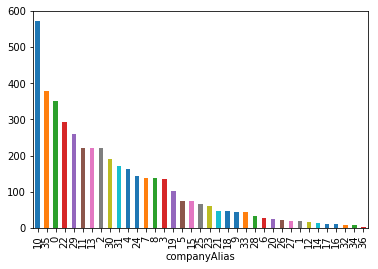

In [21]:
churn.groupby('companyAlias').size().sort_values(ascending=False).plot(kind='bar');

It can be seen that the number of employees is distributed exponentially from 585 to 2. Let's find out how many mean employees are in companies.

In [22]:
print('Mean count of employees %.2f' % churn.groupby('companyAlias').size().mean())

Mean count of employees 118.30


Let's look at the distribution of number votes among employees.

In [23]:
churn['numVotes'].describe()

count    4377.000000
mean       50.544208
std        73.246803
min         1.000000
25%         5.000000
50%        19.000000
75%        66.000000
max       740.000000
Name: numVotes, dtype: float64

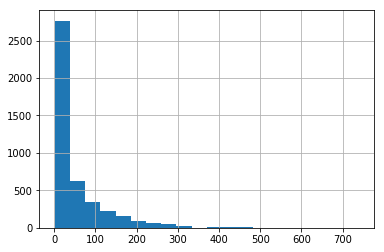

In [24]:
churn['numVotes'].hist(bins=20);

Note that 75 percent of employees passed less than 66 votes. Number of votes is distributed exponentially.
Let's explore the people with the most votes.

In [25]:
churn.sort_values('numVotes', ascending=False).head(10)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
1887,10_219,10,740,2017-03-20 05:45:53,True
1665,10_101,10,688,2017-03-20 11:53:20,True
1543,10_38,10,687,2017-02-01 00:00:00,False
1687,10_112,10,558,2017-03-20 00:00:00,True
1697,10_117,10,526,2017-03-20 00:00:00,True
1683,10_110,10,500,2017-03-20 17:02:49,True
1720,10_129,10,493,2017-03-20 00:00:00,True
2034,10_475,10,492,2017-03-20 11:53:20,True
1753,10_146,10,488,2017-01-31 12:56:38,False
1958,10_319,10,480,2016-07-19 15:29:20,False


You can see that they work in one company and most of them are not fired yet, this can be a good feature.
Let's see other companies.

In [26]:
churn[churn['companyAlias'] != 10].sort_values('numVotes', ascending=False).head(10)

,employee,companyAlias,numVotes,lastParticipationDate,stillExists
35,0_24,0,404,2017-03-20 18:00:17,True
441,2_38,2,377,2017-03-20 07:57:56,True
138,0_152,0,371,2017-03-20 15:44:02,True
47,0_34,0,369,2017-03-20 15:44:02,True
147,0_169,0,364,2017-03-20 13:30:50,True
2775,15_25,15,329,2017-03-20 00:00:00,True
2542,13_23,13,325,2017-03-20 16:01:33,True
89,0_93,0,321,2017-03-20 00:00:00,True
2527,13_8,13,320,2017-03-20 00:00:00,True
2538,13_19,13,320,2017-03-20 16:01:33,True


We can observe quite a large scatter: 404 in company - 0, and 740 in company - 10. **And in other companies, people with a large number of votes work**

**lastParticipationDate** field is the date of the last vote, let's consider it

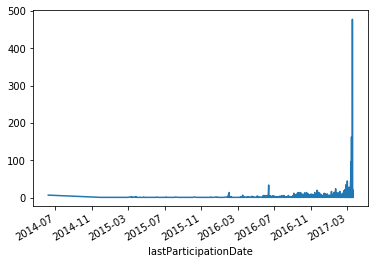

In [27]:
churn.groupby('lastParticipationDate').size().plot();

Let's look at the same data, but with a weekly sliding window.

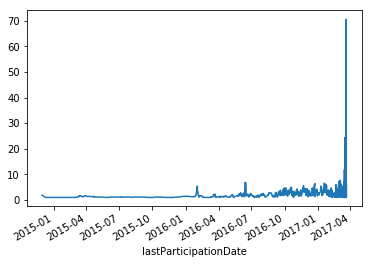

In [28]:
churn.groupby('lastParticipationDate').size().rolling(window=7).mean().plot();

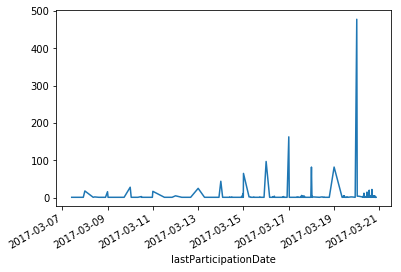

In [29]:
churn[churn['lastParticipationDate'] > '2017-03-07 00:00:00'].groupby('lastParticipationDate').size().plot();

In [30]:
print('The first record date - ', churn['lastParticipationDate'].min())
print('The last record date - ', churn['lastParticipationDate'].max())
td = (churn['lastParticipationDate'].max() - churn['lastParticipationDate'].min())
print('We have data for %.2f years' % (td.days/365))

The first record date -  2014-06-07 00:00:00
The last record date -  2017-03-20 20:25:54
We have data for 2.79 years


We can see that the number of votes at the end is growing strongly. This may be due to the growing popularity of the application or something else.

Ok, let's create our **target attribute from stillExists**

In [31]:
churn['target'] = (-churn['stillExists']).astype('int')
churn.drop('stillExists', axis=1, inplace=True)

In [32]:
churn.head()

,employee,companyAlias,numVotes,lastParticipationDate,target
0,0_512,0,4,2017-02-23 11:48:04,0
2,0_2,0,72,2017-03-17 00:00:00,0
4,0_3,0,22,2017-02-16 00:00:00,0
6,0_4,0,195,2017-03-20 00:00:00,0
7,0_516,0,29,2017-03-20 11:28:45,0


Correlations with other features.

In [33]:
churn['target'].value_counts()

0    3671
1     706
Name: target, dtype: int64

### Please note that our target variable is whether the person is still working. 1 - the employee does not work, 0 - the employee works.

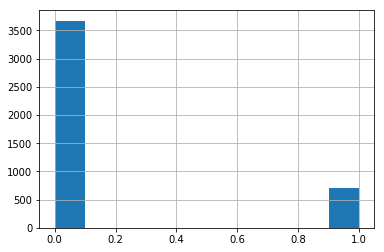

In [34]:
churn['target'].hist();

Let's look at the average number of votes for different classes.

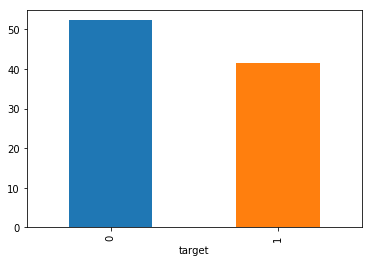

In [35]:
churn.groupby('target')['numVotes'].mean().plot(kind='bar');

In [36]:
churn[churn['target'] == 0]['numVotes'].mean(), \
churn[churn['target'] == 1]['numVotes'].mean()

(52.27948787796241, 41.521246458923514)

As we can see, it is not much different in classes, although it should be noted that it is still higher for those who work

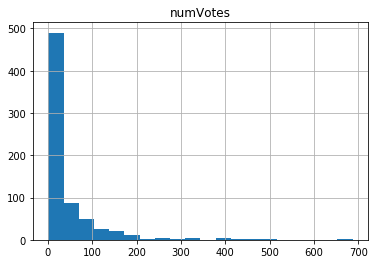

In [37]:
churn[churn['target'] == 1].hist('numVotes', bins=20);

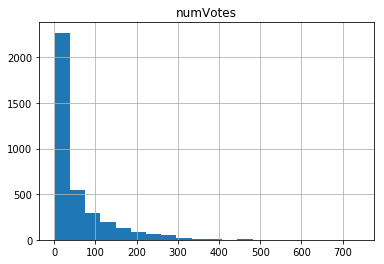

In [38]:
churn[churn['target'] == 0].hist('numVotes', bins=20);

Let's look at the ratio of classes in companies

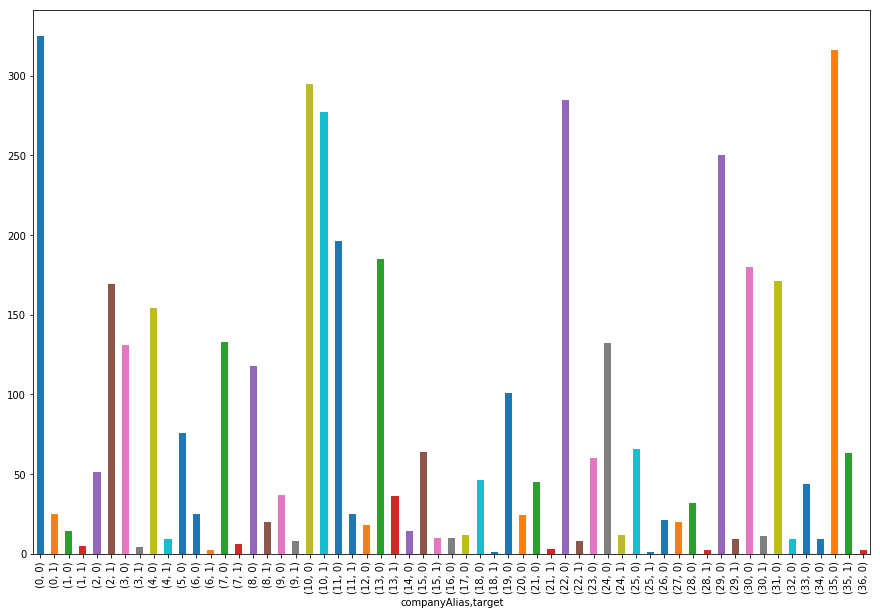

In [39]:
churn.groupby(['companyAlias', 'target'])['employee'].count().plot(kind='bar', figsize=(15, 10));

In my opinion, this is a **very interesting** graph, here we can immediately notice 2 interesting facts.
First, in large companies there are more retired employees. Later we look at correlation happiness with the number of employees in the company.
Second, there are companies in which all employees work.

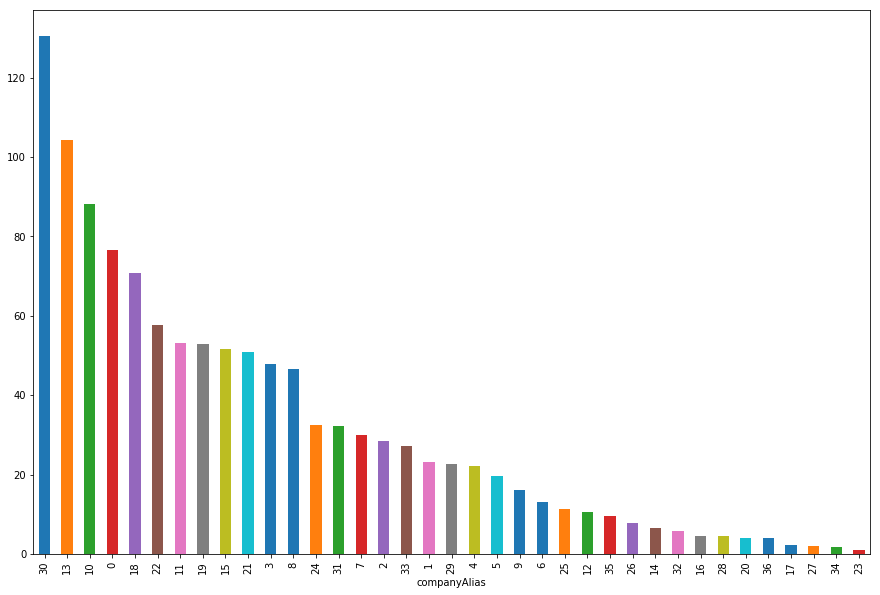

In [40]:
churn.groupby('companyAlias')['numVotes'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(15, 10));

##### 2.1.3. Churn. Patterns, insights, pecularities of data<a id='part2.1.3'></a>

In this data set, we noticed several important observations:
1. Employees with negative identifiers and zero votes are not suitable for our task, as they have no votes.
2. We have both large companies (585 employees) and small ones (9 employees), and with the help of a diagram, we have established that the turnover in large companies is larger.
3. There are companies in which all employees work.
4. The required class has lower number of votes.
5. The number of votes increases over time.
6. No data gaps.

#### Part 2.2.Votes<a id='part2.2'></a>

##### Part 2.2.1. Votes. Dataset and features description<a id='part2.2.1'></a>

The data about the votes of the app users is stored in **votes.csv**. This file containg 4 different columns:

- **employee**: An integer id that identifies an employee inside a company.
- **companyAlias**: A hash id for a given company.
- **voteDate**: String representing the date a given vote was emited.
- **vote**: The numeric value of the vote emited ranging from 1 to 4.

In [41]:
votes = pd.read_csv(
    'data/indiv/votes.csv',parse_dates=[2],
    dtype={
        'employee': np.int32, 'vote': np.int32
    }).drop_duplicates()
votes.head()

,employee,companyAlias,voteDate,vote
0,31,56aec740f1ef260003e307d6,2016-02-01,4
1,33,56aec740f1ef260003e307d6,2016-02-01,4
2,79,56aec740f1ef260003e307d6,2016-02-01,4
3,94,56aec740f1ef260003e307d6,2016-02-01,4
4,16,56aec740f1ef260003e307d6,2016-02-01,2


It is necessary to bring identifiers of employees and companies in a general view.

In [42]:
votes = votes[votes['employee'] > 0]
votes['companyAlias'] = votes['companyAlias'].map(companies_map).astype('int')
votes['employee'] = votes['companyAlias'].astype(str)+"_"+votes['employee'].astype(str)

In [43]:
votes.head()

,employee,companyAlias,voteDate,vote
0,0_31,0,2016-02-01,4
1,0_33,0,2016-02-01,4
2,0_79,0,2016-02-01,4
3,0_94,0,2016-02-01,4
4,0_16,0,2016-02-01,2


In [44]:
votes.describe().T

,count,mean,std,min,25%,50%,75%,max
companyAlias,221145.0,14.122680,10.033457,0.0,8.0,11.0,22.0,36.0
vote,221145.0,2.861634,0.986119,1.0,2.0,3.0,4.0,4.0


In [45]:
votes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 221145 entries, 0 to 221231
Data columns (total 4 columns):
employee        221145 non-null object
companyAlias    221145 non-null int64
voteDate        221145 non-null datetime64[ns]
vote            221145 non-null int32
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 7.6+ MB


Let's see what number of votes are employees of companies

In [46]:
print(votes['companyAlias'].value_counts().head());

10    50392
0     26756
30    24902
13    23023
22    16886
Name: companyAlias, dtype: int64


##### Part 2.2.2. Votes. Exploratory data analysis, visual analysis of the features<a id='part2.2.2'></a>

Look at the distribution of votes

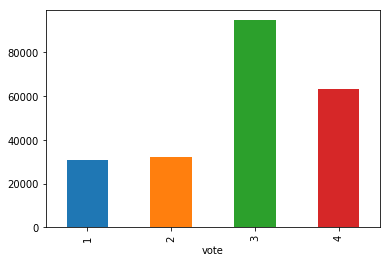

In [47]:
votes.groupby('vote').size().plot(kind='bar');

We see that people are mostly **almost happy** in their companies.<br>
It is interesting to look at the distribution of votes for different time periods, add a couple of features.

In [48]:
votes['day_of_week'] = votes['voteDate'].dt.dayofweek
votes['month'] = votes['voteDate'].dt.month
votes['year'] = votes['voteDate'].dt.year

How much time do we have a votes stats?

In [49]:
print(votes['voteDate'].min(), votes['voteDate'].max())

2014-06-07 00:00:00 2017-03-20 00:00:00


In this period we have votes - **2014.06 - 2017.03**.

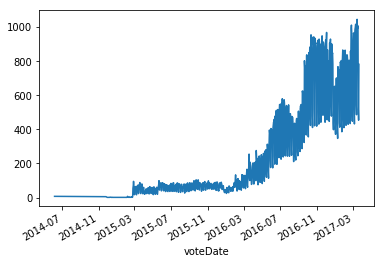

In [50]:
votes.groupby('voteDate').size().plot();

On this graph, we are convinced of the hypothesis that the popularity of the application is growing.<br>
Let's look at the same graph but with a sliding window.

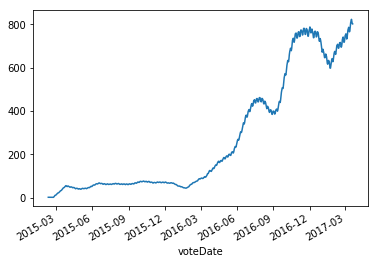

In [51]:
votes.groupby('voteDate').size().rolling(window=31).mean().plot();

Let's try to build a schedule for months.

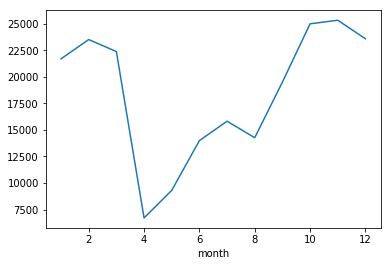

In [52]:
votes.groupby('month').size().plot();

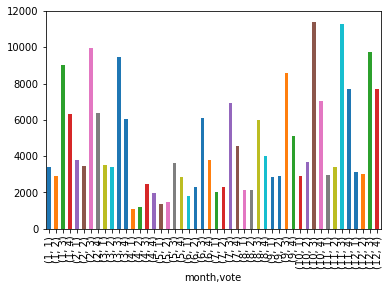

In [53]:
votes.groupby(['month', 'vote']).size().plot(kind='bar');

As we can see, the schedule is very similar to the last year, because last year was the largest audience increase.<br>
Build a schedule for the days of the week.


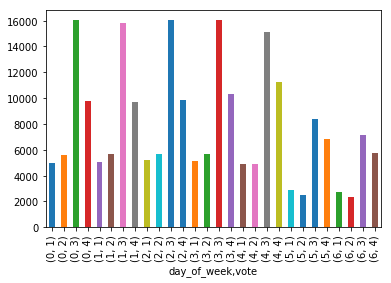

In [54]:
votes.groupby(['day_of_week', 'vote']).size().plot(kind='bar');

In general, every day reflects the setting as a whole, but you can see that on Friday more people put 4, which means that they are happier before the weekend. And some strange people are voting on weekends and their vote 1 frequency is higher than usual.

Look at the distribution of votes by year.

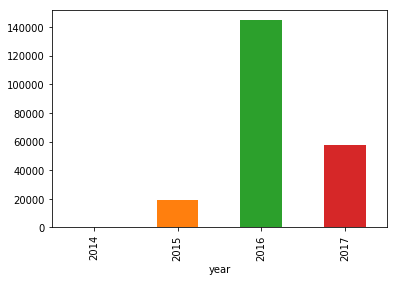

In [55]:
votes.groupby('year').size().plot(kind='bar');

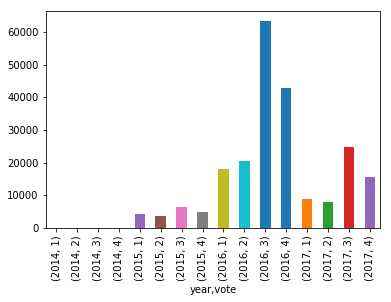

In [56]:
votes.groupby(['year', 'vote']).size().plot(kind='bar');

The application is growing very actively, we can see that in just 3 months of 2017, the application has already gained about half of the votes in 2016.

Let's see how employees vote on average

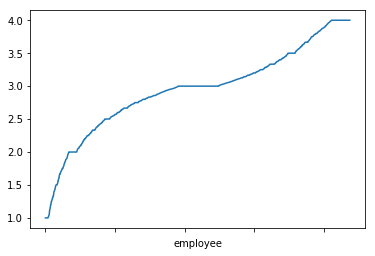

In [57]:
votes.groupby('employee')['vote'].mean().sort_values().plot();

I wonder how the average vote in the company.

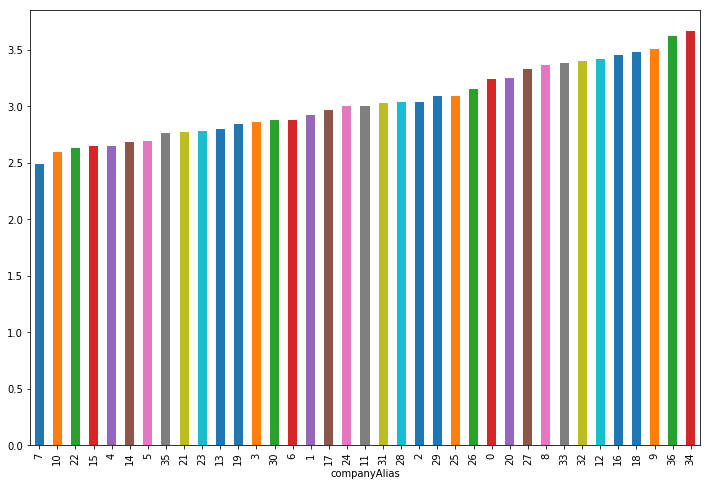

In [58]:
votes.groupby('companyAlias')['vote'].mean().sort_values().plot(kind='bar', figsize=(12, 8));

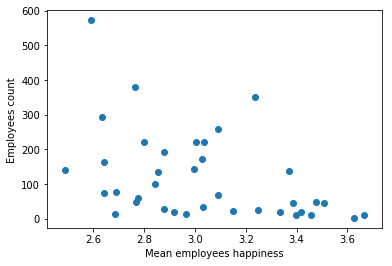

In [59]:
plt.scatter(x=votes.groupby('companyAlias')['vote'].mean(), y=churn.groupby('companyAlias')['employee'].size());
plt.ylabel('Employees count')
plt.xlabel('Mean employees happiness')
plt.show()

In this graph, we see an important **relationship between employee happiness and company size**; the higher the number of employees, the less happy the employee.

Plot the average churn and happiness level for the company

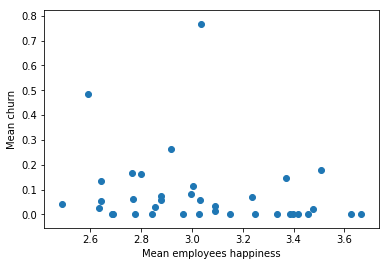

In [60]:
plt.scatter(x=votes.groupby('companyAlias')['vote'].mean(), y=churn.groupby('companyAlias')['target'].mean());
plt.xlabel('Mean employees happiness')
plt.ylabel('Mean churn')
plt.show()

It seems intuitively that not happy people quit more often, but there is no strict dependence

##### 2.2.3. Votes. Patterns, insights, pecularities of data<a id='part2.2.3'></a>

In this data set, we noticed several important observations:
1. Data collected for the period 2014.06 - 2017.03.
2. Application is growing very actively
3. People are mostly almost happy in their companies and choose 3.
4. On Friday more people put 4.
5. Correlation between employee happiness and company size is negative.
6. No data gaps.

#### Part 2.3. Anonimized clean comments<a id='part2.3'></a>

##### Part 2.3.1. Anonimized clean comments. Dataset and features description<a id='part2.3.1'></a>

It is possible to find data about the comments written in the app in the **comments_clean_anonimized.csv** file, and it has the following structure:

- **employee**: An integer id that identifies an employee inside a company.
- **companyAlias**: A hash id for a given company.
- **commentDate**: String representing the date a given comment was written.
- **commentId**: A unique id for a given comment.
- **comment**: Anonimized comment. It has the same length as the original comment. 
- **likes**: Number of likes that the comment received.
- **dislikes**: Number of dislikes that the comment received.

In [61]:
comments = pd.read_csv(
    'data/indiv/comments_clean_anonimized.csv', parse_dates=[-1],
    dtype={
        'employee': np.int32, 'likes': np.float, 'dislikes': np.float
    }).drop_duplicates()
comments.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,307,56aec740f1ef260003e307d6,58d018d7e010990004e38070,**********************************************...,4.0,0.0,2017-03-20 18:00:17
1,382,56aec740f1ef260003e307d6,58d0179ae010990004e3806d,*****************************,1.0,2.0,2017-03-20 17:55:16
2,172,56aec740f1ef260003e307d6,58cff8cde010990004e37f6a,***************************,3.0,0.0,2017-03-20 15:44:02
3,135,56aec740f1ef260003e307d6,58cfefeee010990004e37f60,***************************,1.0,1.0,2017-03-20 15:06:08
4,225,56aec740f1ef260003e307d6,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,2017-03-20 13:30:50


In [62]:
comments.describe()

,employee,likes,dislikes
count,42019.000000,42018.000000,42018.000000
mean,135.022656,6.889595,1.287234
std,162.893510,7.719326,2.740623
min,-217.000000,0.000000,0.000000
25%,28.000000,2.000000,0.000000
50%,101.000000,4.000000,0.000000
75%,197.000000,9.000000,1.000000
max,999.000000,86.000000,53.000000


In [63]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42019 entries, 0 to 82755
Data columns (total 7 columns):
employee        42019 non-null int32
companyAlias    42019 non-null object
commentId       42019 non-null object
txt             41910 non-null object
likes           42018 non-null float64
dislikes        42018 non-null float64
commentDate     42018 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), object(3)
memory usage: 2.4+ MB


In [64]:
comments['txt'].fillna('', inplace=True)

It is necessary to bring identifiers of employees and companies in a general view.

In [65]:
comments = comments[comments['employee'] > 0]
comments['companyAlias'] = comments['companyAlias'].map(companies_map).astype('int')
comments['employee'] = comments['companyAlias'].astype(str)+"_"+comments['employee'].astype(str)

In [66]:
comments.head()

,employee,companyAlias,commentId,txt,likes,dislikes,commentDate
0,0_307,0,58d018d7e010990004e38070,**********************************************...,4.0,0.0,2017-03-20 18:00:17
1,0_382,0,58d0179ae010990004e3806d,*****************************,1.0,2.0,2017-03-20 17:55:16
2,0_172,0,58cff8cde010990004e37f6a,***************************,3.0,0.0,2017-03-20 15:44:02
3,0_135,0,58cfefeee010990004e37f60,***************************,1.0,1.0,2017-03-20 15:06:08
4,0_225,0,58cfd9b4e010990004e37f52,*********************************,3.0,2.0,2017-03-20 13:30:50


We can notice that the comment text is encoded, but we can use it, we can take its length and create an indication of the presence of the text. <br>
and add a couple of time-related features

In [67]:
def get_len(txt):
    if type(txt) == str:
        return len(txt)
    else:
        return 0
        
def text_exist(txt):
    if type(txt) == str and len(txt) > 0:
        return 1
    else:
        return 0
        
comments['txt_len'] = comments['txt'].apply(get_len)
comments['txt_exist'] = comments['txt'].apply(text_exist)

comments['day_of_week'] = comments['commentDate'].dt.dayofweek
comments['month'] = comments['commentDate'].dt.month
comments['year'] = comments['commentDate'].dt.year

comments.drop(columns=['txt'], axis=1, inplace=True)

In [68]:
comments.dropna(inplace=True)

In [69]:
comments['likes'] = comments['likes'].astype('int64')
comments['dislikes'] = comments['dislikes'].astype('int64')

In [70]:
comments.head()

,employee,companyAlias,commentId,likes,dislikes,commentDate,txt_len,txt_exist,day_of_week,month,year
0,0_307,0,58d018d7e010990004e38070,4,0,2017-03-20 18:00:17,62,1,0.0,3.0,2017.0
1,0_382,0,58d0179ae010990004e3806d,1,2,2017-03-20 17:55:16,29,1,0.0,3.0,2017.0
2,0_172,0,58cff8cde010990004e37f6a,3,0,2017-03-20 15:44:02,27,1,0.0,3.0,2017.0
3,0_135,0,58cfefeee010990004e37f60,1,1,2017-03-20 15:06:08,27,1,0.0,3.0,2017.0
4,0_225,0,58cfd9b4e010990004e37f52,3,2,2017-03-20 13:30:50,33,1,0.0,3.0,2017.0


##### Part 2.3.2. Anonimized clean comments. Exploratory data analysis, visual analysis of the features<a id='part2.3.2'></a>

Let's see how comments are distributed by time.

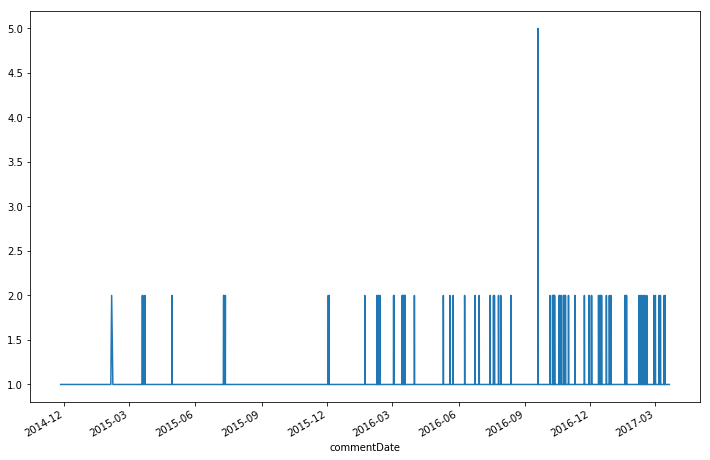

In [71]:
comments.groupby('commentDate').size().plot(figsize=(12, 8));

This is usually 1 or 2 comments. Here we do not see the growth of comments over time, but there is some kind of surge, you can explore it.

In [72]:
comments[(comments['commentDate'] > '2016-09-01') & (comments['commentDate'] < '2016-10-01')].groupby('employee').size().sort_values(ascending=False).head()

employee
22_278    23
13_1      20
10_146    19
13_11     19
2_38      17
dtype: int64

In [73]:
comments[
    (comments['commentDate'] > '2016-09-01') & 
    (comments['commentDate'] < '2016-10-01') &
    (comments['employee'] == '22_278')
]

,employee,companyAlias,commentId,likes,dislikes,commentDate,txt_len,txt_exist,day_of_week,month,year
59180,22_278,22,57ede598d8f22d00035bd251,6,2,2016-09-30 04:09:12,96,1,4.0,9.0,2016.0
59188,22_278,22,57ecc6d97a9f230003b279bd,28,3,2016-09-29 07:42:27,378,1,3.0,9.0,2016.0
59205,22_278,22,57eb5401a3f5a4000311c188,10,0,2016-09-28 05:23:32,91,1,2.0,9.0,2016.0
59209,22_278,22,57ea9067bad95d0003085945,25,2,2016-09-27 15:28:19,150,1,1.0,9.0,2016.0
59240,22_278,22,57e64e2880162d00036517b8,7,1,2016-09-24 09:56:13,105,1,5.0,9.0,2016.0
59244,22_278,22,57e579736d641600035db8f9,3,0,2016-09-23 18:50:00,42,1,4.0,9.0,2016.0
59262,22_278,22,57e386e7c75edd00036cd12d,8,1,2016-09-22 07:22:06,169,1,3.0,9.0,2016.0
59268,22_278,22,57e2ab429230820003af1543,22,1,2016-09-21 15:45:33,30,1,2.0,9.0,2016.0
59283,22_278,22,57e0c6ffdbf1190003416fdc,1,0,2016-09-20 05:19:06,102,1,1.0,9.0,2016.0
59287,22_278,22,57dfe58b838c0d0003e2ac1a,13,1,2016-09-19 13:17:06,111,1,0.0,9.0,2016.0


The employee actually writes messages of different lengths, and judging by likes, his colleagues like them.<br>
Let's see, does he still work?

In [74]:
churn[churn['employee'] == '22_278']

,employee,companyAlias,numVotes,lastParticipationDate,target
3287,22_278,22,184,2017-03-15 17:32:04,0


Yes, this employee is still working. I assume that the **presence and length of the text** are good features

How many comments can be written per day?

In [75]:
comments.groupby(['commentDate', 'employee']).size().max()

2

Let's look at a couple of graphs with likes and dislikes.

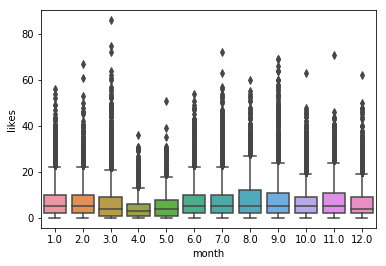

In [76]:
sns.boxplot(x='month', y='likes', data=comments);

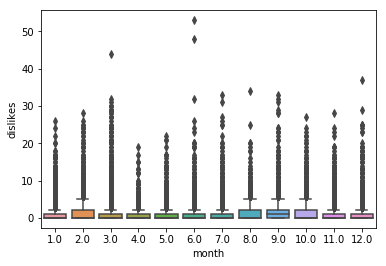

In [77]:
sns.boxplot(x='month', y='dislikes', data=comments);

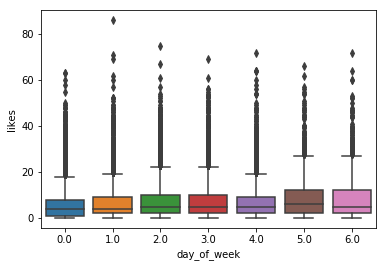

In [78]:
sns.boxplot(x='day_of_week', y='likes', data=comments);

Interestingly, there are not so many votes on weekends, but comments written on weekends collect a lot of likes, as seen in the diagram above.

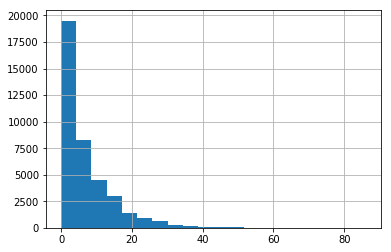

In [79]:
comments['likes'].hist(bins=20);

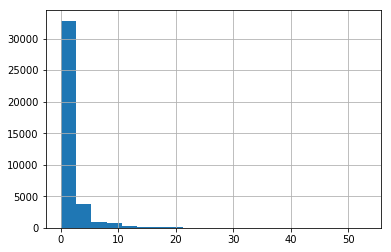

In [80]:
comments['dislikes'].hist(bins=20);

Let's check the relationship between lenght text and the number of likes.

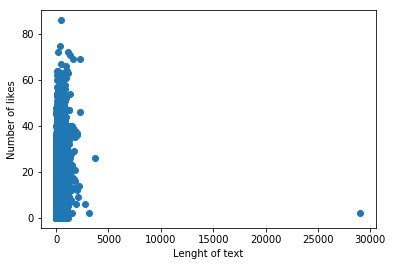

In [81]:
plt.scatter(x=comments['txt_len'], y=comments['likes'])
# plt.label(label='Correlation bitween length of text and likes')
plt.xlabel('Lenght of text')
plt.ylabel('Number of likes')
plt.show()

We cannot interpret the graph because of the text 30k long. Let's fix it.

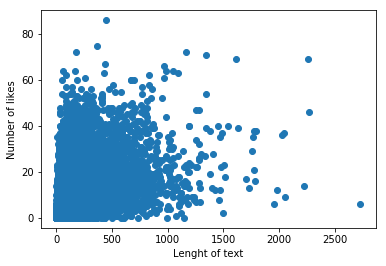

In [82]:
plt.scatter(x=comments[comments['txt_len'] < 3000]['txt_len'], y=comments[comments['txt_len'] < 3000]['likes'])
plt.xlabel('Lenght of text')
plt.ylabel('Number of likes')
plt.show()

There is no clear relationship. A large number of likes can get short comments, and a little long ones.

In [83]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38993 entries, 0 to 81636
Data columns (total 11 columns):
employee        38993 non-null object
companyAlias    38993 non-null int64
commentId       38993 non-null object
likes           38993 non-null int64
dislikes        38993 non-null int64
commentDate     38993 non-null datetime64[ns]
txt_len         38993 non-null int64
txt_exist       38993 non-null int64
day_of_week     38993 non-null float64
month           38993 non-null float64
year            38993 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(5), object(2)
memory usage: 4.8+ MB


There is one dirty record, I know what this record is, it is the last one in this dataset

In [84]:
comments[-1:]

,employee,companyAlias,commentId,likes,dislikes,commentDate,txt_len,txt_exist,day_of_week,month,year
81636,35_1,35,58a73005e75bda00042a3472,12,0,2017-02-17 17:16:25,52,1,4.0,2.0,2017.0


Perhaps, when downloading data from the application, it appeared.

In [85]:
comments.dropna(inplace=True)

Lastly, we look at the correlation of features

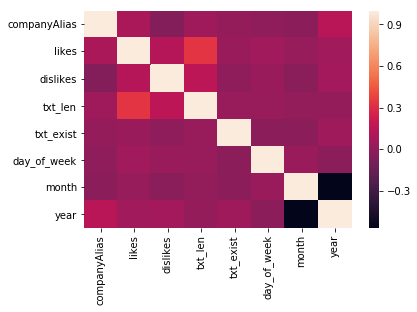

In [86]:
sns.heatmap(comments.corr());

The dependence of likes and length of the text is highlighted.

##### 2.3.3.  Anonimized clean comments. Patterns, insights, pecularities of data<a id='part2.3.3'></a>

In this data set, we noticed several important observations:

1. There is a text with a very long one.
2. There is a slight relationship between likes and long text.
3. There are no people in the data who would write more than 2 comments per day.
4. Comments written on the weekend, collect more likes.
5. No data gaps.

#### Part 2.4. Interactions with comments<a id='part2.4'></a>

##### Part 2.4.1.  Interactions with comments. Dataset and features description<a id='part2.4.1'></a>

The file **commentInteractions.csv** contains information about which employee liked or disliked a given comment.

- **employee**: An integer id that identifies an employee inside a company.
- **companyAlias**: A hash id for a given company.
- **commentId**: A unique id for a given comment that allows us to relate it with the comments in anon_comments.csv.
- **liked**: A boolean that is True if the employee liked the comment.
- **disliked**: A boolean that is True if the employee disliked the comment.

In [87]:
comments_inters = pd.read_csv('data/indiv/commentInteractions.csv',
                              dtype={
                                  'employee': np.int32, 
                                  'liked': np.int32, 
                                  'disliked': np.int32
                              }).drop_duplicates().dropna()
comments_inters.head()

,employee,companyAlias,liked,disliked,commentId
0,307,56aec740f1ef260003e307d6,1.0,0.0,58d018d7e010990004e38070
1,36,56aec740f1ef260003e307d6,1.0,0.0,58d018d7e010990004e38070
2,276,56aec740f1ef260003e307d6,1.0,0.0,58d018d7e010990004e38070
3,24,56aec740f1ef260003e307d6,1.0,0.0,58d018d7e010990004e38070
4,382,56aec740f1ef260003e307d6,1.0,0.0,58d0179ae010990004e3806d


In [88]:
comments_inters.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 336952 entries, 0 to 336958
Data columns (total 5 columns):
employee        336952 non-null int32
companyAlias    336952 non-null object
liked           336952 non-null float64
disliked        336952 non-null float64
commentId       336952 non-null object
dtypes: float64(2), int32(1), object(2)
memory usage: 14.1+ MB


In [89]:
comments_inters['companyAlias'] = comments_inters['companyAlias'].map(companies_map).astype('int')
comments_inters = comments_inters[comments_inters['employee'] >= 0]

Create unique employees ids<p>

In [90]:
comments_inters['employee'] = comments_inters['companyAlias'].astype(str)+"_"+comments_inters['employee'].astype(str)

In [91]:
comments_inters.head()

,employee,companyAlias,liked,disliked,commentId
0,0_307,0,1.0,0.0,58d018d7e010990004e38070
1,0_36,0,1.0,0.0,58d018d7e010990004e38070
2,0_276,0,1.0,0.0,58d018d7e010990004e38070
3,0_24,0,1.0,0.0,58d018d7e010990004e38070
4,0_382,0,1.0,0.0,58d0179ae010990004e3806d


How many likes and dislikes by companies

In [92]:
comments_inters['companyAlias'].value_counts().head()

10    63786
13    44427
0     42153
30    41361
22    29297
Name: companyAlias, dtype: int64

Distribution of **likes** by company

By one record employee can liked or disliked, but not together

In [93]:
len(comments_inters[
    (comments_inters['liked'] == False) & (comments_inters['disliked'] == False)
]) 

0

##### Part 2.4.2. Interactions with comments. Exploratory data analysis, visual analysis of the features<a id='part2.4.2'></a>

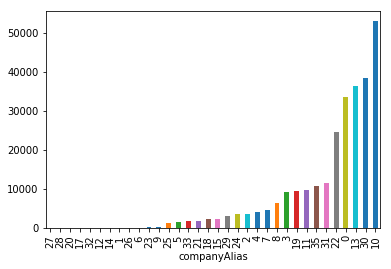

In [94]:
comments_inters[comments_inters['liked'] == True].groupby('companyAlias').size().sort_values().plot(kind='bar');

Distribution of **dislikes** by company

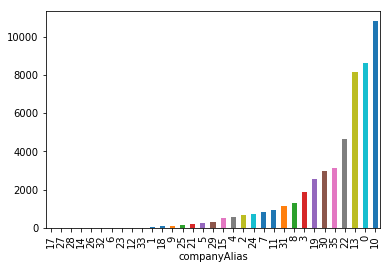

In [95]:
comments_inters[comments_inters['liked'] == False].groupby('companyAlias').size().sort_values().plot(kind='bar');

In big companies expectedly most like and dislike

Look at the number of employees in the company and how many likes and dislikes per employee

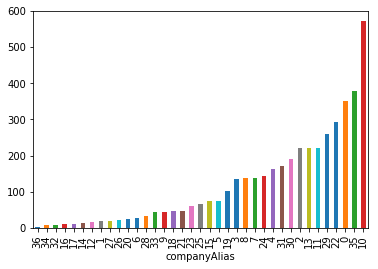

In [96]:
churn.groupby('companyAlias')['employee'].size().sort_values().plot(kind='bar');

key - Interactions per employee, value - number employees

In [97]:
dict(zip((comments_inters.groupby('companyAlias').size() // churn.groupby('companyAlias').size()), churn.groupby('companyAlias').size()))

{nan: 10,
 0.0: 34,
 1.0: 12,
 2.0: 9,
 3.0: 21,
 5.0: 60,
 9.0: 45,
 13.0: 259,
 19.0: 220,
 21.0: 67,
 22.0: 76,
 28.0: 163,
 29.0: 144,
 36.0: 379,
 38.0: 74,
 42.0: 44,
 43.0: 48,
 48.0: 221,
 50.0: 47,
 55.0: 138,
 73.0: 171,
 82.0: 135,
 120.0: 350,
 201.0: 221,
 216.0: 191,
 nan: 2,
 nan: 9,
 99.0: 293,
 111.0: 572,
 119.0: 101}

We may notice that very small companies have no records

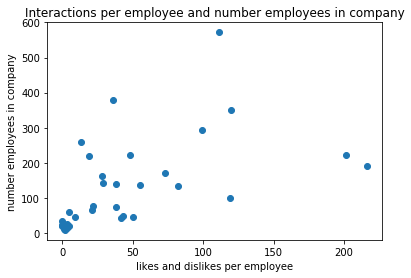

In [98]:
plt.scatter(
    x=comments_inters.groupby('companyAlias').size() // churn.groupby('companyAlias').size(), 
    y=churn.groupby('companyAlias').size()
)
plt.title('Interactions per employee and number employees in company')
plt.xlabel('likes and dislikes per employee')
plt.ylabel('number employees in company')
plt.show()

Let's see how much an employee can do interactions

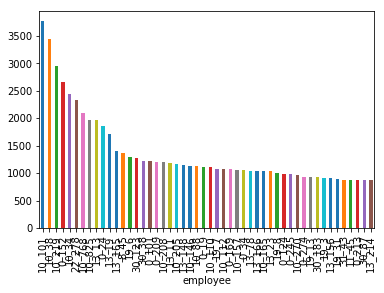

In [99]:
comments_inters.groupby('employee').size().sort_values(ascending=False).head(50).plot(kind='bar');

In [100]:
comments_inters.groupby('employee').size().mean()

103.10486177311725

There is an assumption that the more active the employee, the higher the likelihood that he works. Let's see if these employees work yet.

In [101]:
so_active_employees = comments_inters.groupby('employee').size().sort_values(ascending=False).keys()[:20]
churn[churn['employee'].isin(so_active_employees)]

,employee,companyAlias,numVotes,lastParticipationDate,target
35,0_24,0,404,2017-03-20 18:00:17,0
97,0_101,0,312,2017-03-20 07:11:08,0
138,0_152,0,371,2017-03-20 15:44:02,0
177,0_209,0,314,2017-03-20 00:00:00,0
1320,8_45,8,185,2017-03-20 12:13:38,0
1535,10_34,10,456,2016-07-14 16:53:52,1
1543,10_38,10,687,2017-02-01 00:00:00,1
1665,10_101,10,688,2017-03-20 11:53:20,0
1868,10_208,10,480,2017-03-19 00:00:00,0
1887,10_219,10,740,2017-03-20 05:45:53,0


Indeed, almost all employees still work.

##### 2.4.3.  Interactions with comments. Patterns, insights, pecularities of data<a id='part2.4.3'></a>

In this data set, we noticed several important observations:

1. There are companies in which employees made 200 interactions per employee.
2. On average, the staff did 109 interactions
3. There are employees who have done 3,500 interactions.
4. There is a correlation between employee activity and that he works.
5. No data gaps.

#### Part 2.5. Employee. Collect all data in one dataset<a id='part2.5'></a>

##### Part 2.5.1. Employee. Dataset and features description<a id='part2.5.1'></a>

Let me remind you that we plan to predict the churnout of employees. <br>
To do this, we need to aggregate the data for each employee and add them to a single set of data.<br>
The following signs seemed interesting to me:
1. Voices (min, max, mean, std)
2. Length and presence of comments (max, mean, std, sum)
3. Reaction to comments of other employees(likes, dislikes) (min, max, mean, std)
4. Reaction to employee comments (likes, dislikes) (min, max, mean, std)
5. The average level of happiness in the company
6. The number of people in the company
7. The number of days between the first and last vote

**'employee'** - unique identifier of the employee<br>
**'companyAlias'** - unique company identifier<br>
**'numVotes'** - the number of votes passed<br>
**'target'** - is the target variable. Still working - 0, Not working - 1<br>

**('vote', 'mean')** - the mean vote of the employee<br>
**('vote', 'min')** - minimum employee’s vote<br>
**('vote', 'max')** - maximum employee vote<br>

**('dislikes', 'mean')** - the mean number of dislikes received for comments from colleagues<br>
**('dislikes', 'sum')** - the total number of dislikes received for comments from colleagues<br>
**('dislikes', 'min')** - the minimum number of dislikes received for comments from colleagues<br>
**('dislikes', 'max')** - the maximum number of dislikes received for comments from colleagues<br>

**('likes', 'mean')** - the mean number of likes received for comments from colleagues<br>
**('likes', 'sum')** - the total number of likes received on their comments from colleagues<br>
**('likes', 'min')** - the minimum number of likes received for comments from colleagues<br>
**('likes', 'max')** - the maximum number of likes received for comments from colleagues<br>

**('txt_len', 'mean')** - mean length of the comment text<br>
**('txt_len', 'sum')** - total length of comment texts<br>
**('txt_len', 'min')** - the minimum length of the comment text<br>
**('txt_len', 'max')** - maximum comment text length<br>

**('txt_exist', 'mean')** - percentage of votes with a comment<br>

**('disliked', 'mean')** - percentage of dislikes from all interactions with colleagues comments<br>
**('disliked', 'sum')** - the total number of dislikes that the employee put<br>

**('liked', 'mean')** - percentage of likes from all interactions with colleagues comments<br>
**('liked', 'sum')** - the total number of likes that the employee put<br>

**'mean_vote_by_company'** - mean happiness of employees in a company<br>
**'num_emploees_by_company'** - the number of employees in the company<br>
**'first_last_vote_days'** - the number of days between the first and last vote<br>

##### Part 2.5.2. Employee. Feature engineering and description <a id='part2.5.2'></a>

In [102]:
employee = pd.DataFrame()
employee = churn[['employee', 'companyAlias', 'numVotes', 'target']]

In [103]:
agg_votes = votes[['employee', 'vote']].groupby('employee', as_index=False).agg({'vote': [np.mean, min, max]})

agg_comments = comments[['employee', 'txt_len', 'likes', 'dislikes', 'txt_exist']]\
    .groupby('employee', as_index=False).agg(
        {
            'txt_len': [np.mean, np.sum, min, max],
            'likes': [np.mean, np.sum, min, max],
            'dislikes': [np.mean, np.sum, min, max],
            'txt_exist': [np.mean]
        }
    )

agg_employee_likes_dislokes = comments_inters[['employee', 'liked', 'disliked']].groupby('employee', as_index=False).agg(
    {
        'liked': [np.mean, np.sum],
        'disliked': [np.mean, np.sum],
    }
)

agg_work_long = votes[['employee', 'voteDate']].groupby('employee', as_index=False).agg({'voteDate': [min, max]})

employee = employee.merge(agg_votes, on=['employee','employee'],how='left')
employee = employee.merge(agg_comments, on=['employee','employee'],how='left')
employee = employee.merge(agg_employee_likes_dislokes, on=['employee','employee'],how='left')
employee = employee.merge(agg_work_long, on=['employee','employee'],how='left')

employee['first_last_vote_days'] = (employee[('voteDate', 'max')] - employee[('voteDate', 'min')]).dt.days
employee.drop([('voteDate', 'max'), ('voteDate', 'min')], axis=1, inplace=True)

employee.head()

,employee,companyAlias,numVotes,target,"(vote, mean)","(vote, min)","(vote, max)","(txt_len, mean)","(txt_len, sum)","(txt_len, min)",...,"(txt_exist, mean)","(likes, mean)","(likes, sum)","(likes, min)","(likes, max)","(liked, mean)","(liked, sum)","(disliked, mean)","(disliked, sum)",first_last_vote_days
0,0_512,0,4,0,2.500000,1,4,114.500000,229.0,111.0,...,1.0,7.500000,15.0,6.0,9.0,1.000000,6.0,0.000000,0.0,37
1,0_2,0,72,0,2.250000,1,4,59.571429,834.0,21.0,...,1.0,5.428571,76.0,0.0,12.0,0.833333,60.0,0.166667,12.0,406
2,0_3,0,22,0,3.454545,2,4,85.555556,770.0,24.0,...,1.0,3.333333,30.0,0.0,14.0,0.545455,6.0,0.454545,5.0,378
3,0_4,0,195,0,3.856410,1,4,68.727273,756.0,17.0,...,1.0,7.272727,80.0,1.0,29.0,0.875000,210.0,0.125000,30.0,368
4,0_516,0,29,0,2.793103,1,4,66.363636,730.0,13.0,...,1.0,6.272727,69.0,1.0,13.0,0.880952,37.0,0.119048,5.0,62


In [104]:
mean_vote_by_company = votes.groupby('companyAlias')['vote'].mean().to_dict()
employee['mean_vote_by_company'] = employee['companyAlias'].map(mean_vote_by_company)

In [105]:
emploies_by_company = churn.groupby('companyAlias')['employee'].count().to_dict()
employee['num_emploees_by_company'] = employee['companyAlias'].map(emploies_by_company)

In [106]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 27 columns):
employee                   4377 non-null object
companyAlias               4377 non-null int64
numVotes                   4377 non-null int32
target                     4377 non-null int64
(vote, mean)               4377 non-null float64
(vote, min)                4377 non-null int32
(vote, max)                4377 non-null int32
(txt_len, mean)            2881 non-null float64
(txt_len, sum)             2881 non-null float64
(txt_len, min)             2881 non-null float64
(txt_len, max)             2881 non-null float64
(dislikes, mean)           2881 non-null float64
(dislikes, sum)            2881 non-null float64
(dislikes, min)            2881 non-null float64
(dislikes, max)            2881 non-null float64
(txt_exist, mean)          2881 non-null float64
(likes, mean)              2881 non-null float64
(likes, sum)               2881 non-null float64
(likes, min)          

In [107]:
employee.fillna(0, inplace=True)

In [108]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4377 entries, 0 to 4376
Data columns (total 27 columns):
employee                   4377 non-null object
companyAlias               4377 non-null int64
numVotes                   4377 non-null int32
target                     4377 non-null int64
(vote, mean)               4377 non-null float64
(vote, min)                4377 non-null int32
(vote, max)                4377 non-null int32
(txt_len, mean)            4377 non-null float64
(txt_len, sum)             4377 non-null float64
(txt_len, min)             4377 non-null float64
(txt_len, max)             4377 non-null float64
(dislikes, mean)           4377 non-null float64
(dislikes, sum)            4377 non-null float64
(dislikes, min)            4377 non-null float64
(dislikes, max)            4377 non-null float64
(txt_exist, mean)          4377 non-null float64
(likes, mean)              4377 non-null float64
(likes, sum)               4377 non-null float64
(likes, min)          

In [109]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
companyAlias,4377.0,16.135024,11.326499,0.000000,7.000000,13.000000,28.000000,36.000000
numVotes,4377.0,50.544208,73.246803,1.000000,5.000000,19.000000,66.000000,740.000000
target,4377.0,0.161298,0.367847,0.000000,0.000000,0.000000,0.000000,1.000000
"(vote, mean)",4377.0,2.945912,0.651171,1.000000,2.640000,3.000000,3.333333,4.000000
"(vote, min)",4377.0,1.908613,0.956246,1.000000,1.000000,2.000000,3.000000,4.000000
"(vote, max)",4377.0,3.696596,0.558522,1.000000,3.000000,4.000000,4.000000,4.000000
"(txt_len, mean)",4377.0,58.169429,76.441240,0.000000,0.000000,37.333333,84.000000,880.500000
"(txt_len, sum)",4377.0,909.926891,2652.419623,0.000000,0.000000,104.000000,698.000000,55496.000000
"(txt_len, min)",4377.0,20.599726,40.579167,0.000000,0.000000,8.000000,23.000000,672.000000
"(txt_len, max)",4377.0,162.749600,509.497878,0.000000,0.000000,62.000000,193.000000,29057.000000


You may notice that the company identifier is a number, so it should not be, we make it a string

In [110]:
employee['companyAlias'] = employee['companyAlias'].astype('str')

You can also see target class 16%

##### Part 2.5.3. Employee. Exploratory data analysis, visual analysis of the features <a id='part2.5.3'></a>

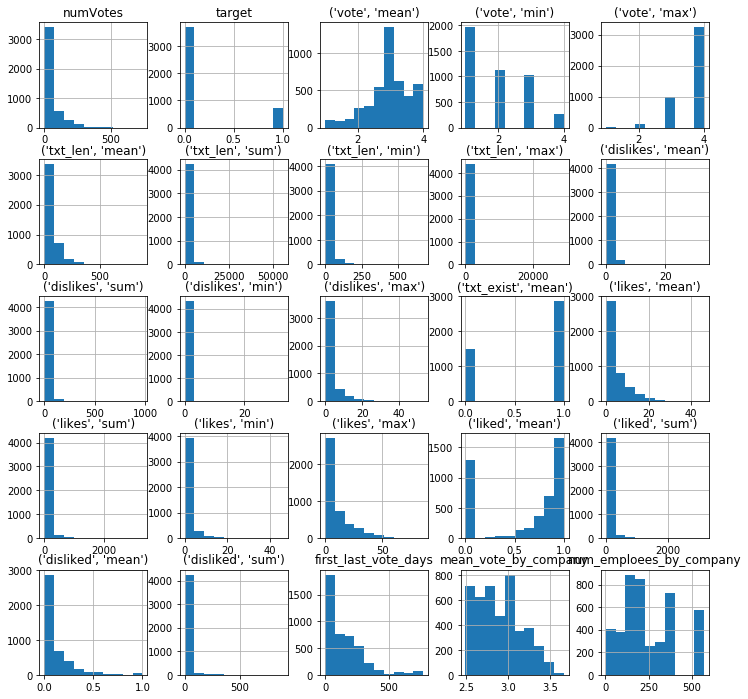

In [111]:
employee.hist(figsize=(12, 12));

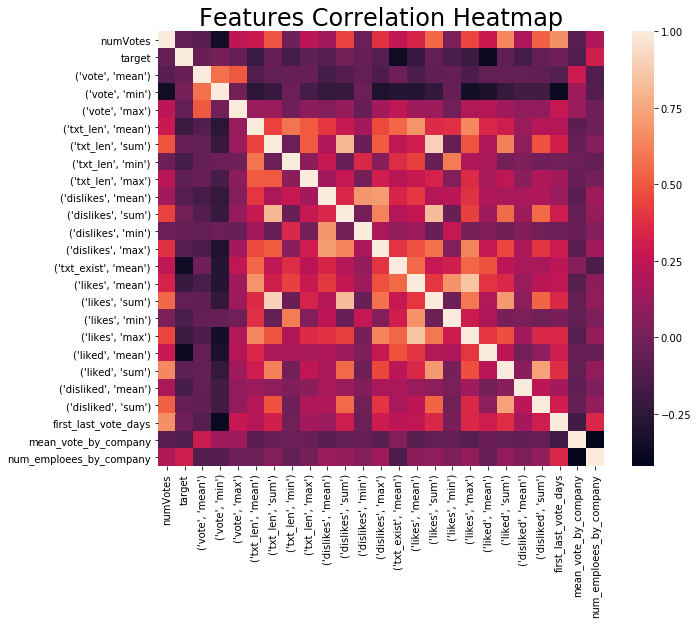

In [112]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 8
sns.heatmap(employee.corr())
plt.title('Features Correlation Heatmap',fontsize=24)
plt.show()

On this heat map we can see a lot of interesting.
The target variable correlates well with parameters such as:
(liked, mean), (txt_exist, mean), (txt_len, mean), (likes, mean), num_emploees_by_company, (vote, mean)

So here we see correlations with the target feature.

In [113]:
employee.corr()['target'].abs().sort_values(ascending=False)[:10]

target                     1.000000
(liked, mean)              0.382977
(txt_exist, mean)          0.366535
num_emploees_by_company    0.309907
(likes, mean)              0.209298
(txt_len, mean)            0.199653
(likes, max)               0.188067
(txt_len, min)             0.159482
(disliked, mean)           0.155697
(likes, min)               0.139235
Name: target, dtype: float64

In [114]:
corr_feat = employee.corr()['target'].abs().sort_values(ascending=False)[:10].keys()

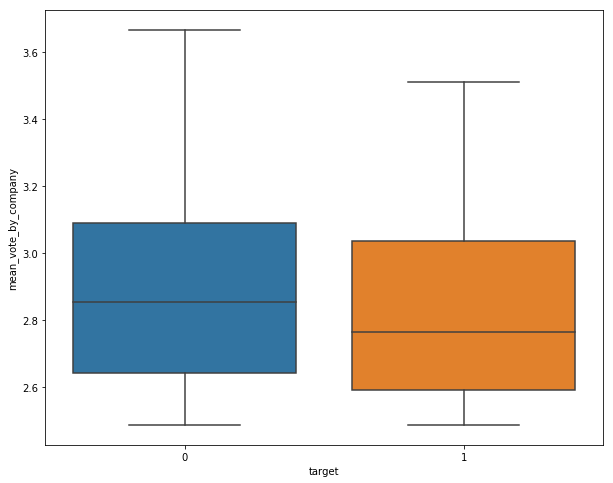

In [115]:
sns.boxplot(y='mean_vote_by_company', x='target', data=employee);

Let's see how representatives of different classes put on dislikes

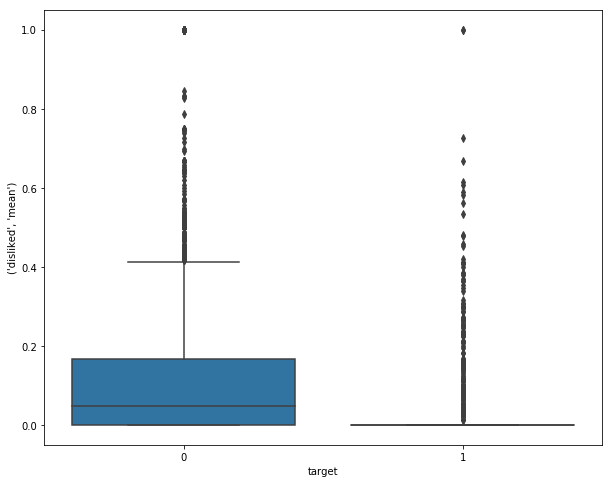

In [116]:
sns.boxplot(y=('disliked', 'mean'), x='target', data=employee);

It can be noted that people who want to leave put less dislikes to comments of other employees.

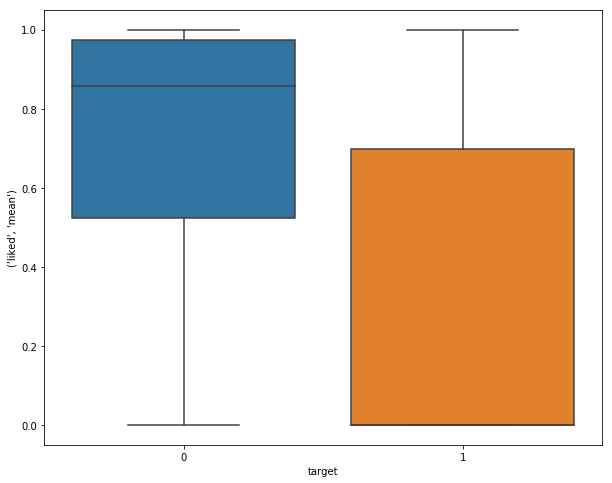

In [117]:
sns.boxplot(y=('liked', 'mean'), x='target', data=employee);

And put less likes to comments of other employees.

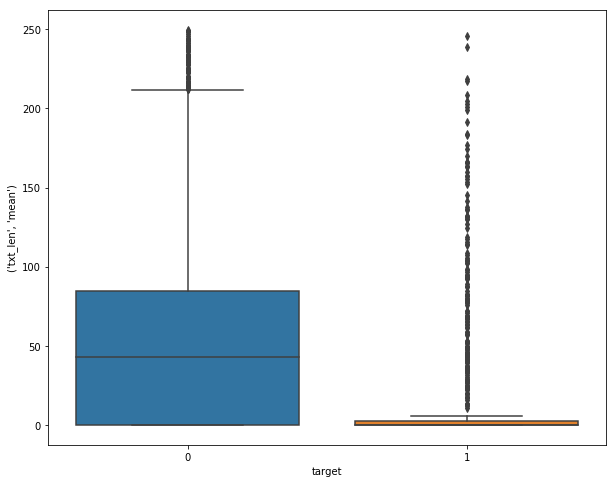

In [118]:
sns.boxplot(y=('txt_len', 'mean'), x='target', data=employee[employee[('txt_len', 'mean')] < 250]);

And less write comments.

What about getting likes

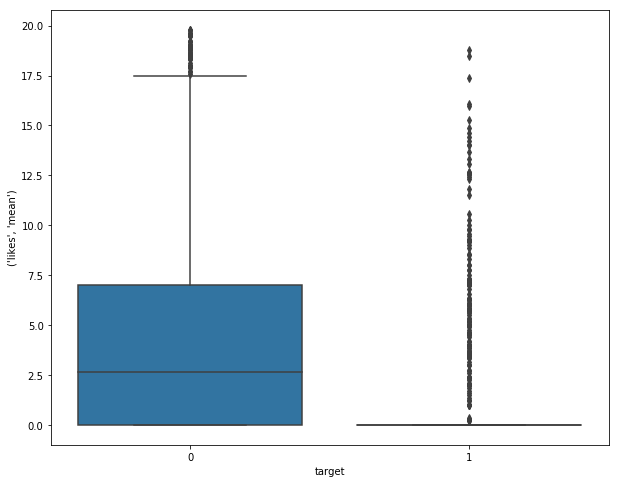

In [119]:
sns.boxplot(y=('likes', 'mean'), x='target', data=employee[employee[('likes', 'mean')] < 20]);

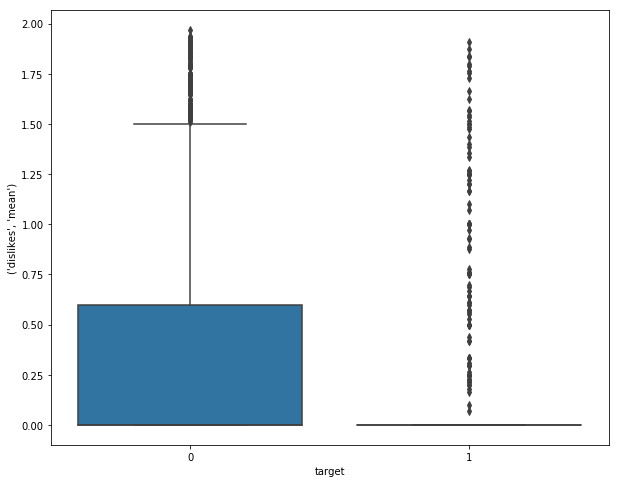

In [120]:
sns.boxplot(y=('dislikes', 'mean'), x='target', data=employee[employee[('dislikes', 'mean')] < 2]);

##### Part 2.5.4. Employee. Patterns, insights, pecularities of data <a id='part2.5.4'></a>

You can make the following assumptions:
1. People actively participating in this application, presumably, also actively communicate with colleagues and they do not quit.
2. If a person writes comments, then he most likely wants to work in a company.
3. The more employees, the higher the turnover.

### Part 3. Visual analysis of the features<a id='part3'></a>

### Part 4. Patterns, insights, pecularities of data <a id='part4'></a>

### Part 5. Data preprocessing<a id='part5'></a>

### Part 6. Feature engineering and description<a id='part6'></a>

Parts 3,4,5,6 are done for each dataset separately, for ease of reading. Sorry, that complicated the assessment of my work, but in my opinion it is logical.

### Part 7. Cross-validation, hyperparameter tuning<a id='part7'></a>

Since we have a strong imbalance in the target feature, we will use train_test_split with stratify.<br>
And for fit model we will use StratifiedKFold.

In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.model_selection import StratifiedKFold, train_test_split

y = employee['target']
X = employee.drop(['target', 'companyAlias'], axis=1).set_index('employee')
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3)

Check that the distribution of classes is the same.

In [122]:
y.value_counts()[0]/y.value_counts()[1], \
y_test.value_counts()[0]/y_test.value_counts()[1], \
y_train.value_counts()[0]/y_train.value_counts()[1]

(5.19971671388102, 5.19811320754717, 5.200404858299595)

In our task, we predict the dismissal of an employee. In our problem there are 2 types of errors.
First, we predicted that the person would quit, and he did not quit, that is, instead of 0, predict 1. This is an error F1.
Second, we say that the person will remain, and he leaves. **This is a f2 error.** For our task, **it is more important**, because We try to minimize the costs associated with hiring new employees.

In [123]:
rf = RandomForestClassifier(random_state=17)
rf.fit(X_train, y_train)
# false negative - f2
# [tn, fp]
# [fn, tp]
confusion_matrix(y_train, rf.predict(X_train))

array([[2554,   15],
       [  47,  447]])

In [124]:
confusion_matrix(y_test, rf.predict(X_test))

array([[1065,   37],
       [  94,  118]])

In [125]:
import operator
sorted(zip(X_train.columns, rf.feature_importances_), key=operator.itemgetter(1), reverse=True)

[('num_emploees_by_company', 0.20422983161191208),
 ('mean_vote_by_company', 0.08762766441657631),
 ('first_last_vote_days', 0.08686866544928236),
 (('liked', 'sum'), 0.08433687522750899),
 ('numVotes', 0.06817508455324282),
 (('vote', 'mean'), 0.06533535990268544),
 (('txt_len', 'max'), 0.05301559282742939),
 (('liked', 'mean'), 0.051557302114450546),
 (('txt_len', 'min'), 0.0348536356003419),
 (('txt_len', 'mean'), 0.032853693162707295),
 (('vote', 'min'), 0.026223637588938597),
 (('disliked', 'mean'), 0.026115128197507338),
 (('likes', 'mean'), 0.025859075994624742),
 (('txt_len', 'sum'), 0.02092766578659625),
 (('likes', 'sum'), 0.02025892294580309),
 (('disliked', 'sum'), 0.0191542030775965),
 (('txt_exist', 'mean'), 0.016278885321209254),
 (('vote', 'max'), 0.015306062385153845),
 (('likes', 'max'), 0.014777306732728765),
 (('dislikes', 'mean'), 0.014716494993992168),
 (('dislikes', 'max'), 0.011467174342393962),
 (('dislikes', 'sum'), 0.010998782046750335),
 (('likes', 'min'), 0

In [126]:
skf = StratifiedKFold(n_splits=3)

def fit_grid_rf(params, cv=skf, X_train=X_train, y_train=y_train):
    rf_for_grid = RandomForestClassifier(random_state=17, n_jobs=-1, bootstrap=True)
    rf_grid = GridSearchCV(estimator=rf_for_grid, param_grid=params, cv=skf)
    rf_grid.fit(X_train, y_train)
    return rf_grid

def get_all_stats(grid, X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
    print('Best grid params: ', grid.best_params_)
    print('Best grid score: ', grid.best_score_)
    print('Confusion matrix for train: ', confusion_matrix(y_train, grid.best_estimator_.predict(X_train)))
    print('Confusion matrix for test: ', confusion_matrix(y_test, grid.best_estimator_.predict(X_test)))
    print('ROC AUC for train: ', roc_auc_score(y_train, grid.best_estimator_.predict_proba(X_train)[:, 1]))
    print('ROC AUC for test: ', roc_auc_score(y_test, grid.best_estimator_.predict_proba(X_test)[:, 1]))
    print('Best features', sorted(zip(X_train.columns, grid.best_estimator_.feature_importances_), key=operator.itemgetter(1), reverse=True)[:8])

Let's try to train the first search grid. Here I have given a lot of weight to the examples of our positive class.

## First grid search 

In [127]:
%%time
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [5, 10, 15],
    'class_weight': [{0: 1, 1: 5}, {0: 1, 1: 9}],
    'max_features': [0.2, 0.5, 0.7,]
}
get_all_stats(fit_grid_rf(rf_params))

Best grid params:  {'n_estimators': 50, 'class_weight': {0: 1, 1: 5}, 'max_depth': 15, 'max_features': 0.2}
Best grid score:  0.9066274893894875
Confusion matrix for train:  [[2519   50]
 [   8  486]]
Confusion matrix for test:  [[1061   41]
 [  79  133]]
ROC AUC for train:  0.9953549247253537
ROC AUC for test:  0.8874944355032017
Best features [('num_emploees_by_company', 0.1391157867602305), ('mean_vote_by_company', 0.09745977800807099), (('liked', 'sum'), 0.09037881914150563), (('liked', 'mean'), 0.08096390373401398), ('first_last_vote_days', 0.06983426174416488), (('txt_len', 'max'), 0.05145834625751002), (('vote', 'mean'), 0.05119721825386927), ('numVotes', 0.04752200575681547)]
CPU times: user 1min 23s, sys: 4.65 s, total: 1min 28s
Wall time: 1min 16s


# Second grid search

In [128]:
%%time
skf = StratifiedKFold(n_splits=3)

rf_params = {
    'n_estimators': [100, 120],
    'max_depth': [15, 16],
    'class_weight': [{0: 1, 1: 5}],
    'max_features': [0.6, 0.7, 0.9],
    'criterion': ['gini', 'entropy']
}
get_all_stats(fit_grid_rf(rf_params))

Best grid params:  {'n_estimators': 100, 'class_weight': {0: 1, 1: 5}, 'max_features': 0.6, 'max_depth': 16, 'criterion': 'entropy'}
Best grid score:  0.9053215801501796
Confusion matrix for train:  [[2533   36]
 [   3  491]]
Confusion matrix for test:  [[1063   39]
 [  75  137]]
ROC AUC for train:  0.9960900994889235
ROC AUC for test:  0.9097096188747733
Best features [('num_emploees_by_company', 0.17897436789699162), (('liked', 'sum'), 0.10153830183949969), ('mean_vote_by_company', 0.10125343050105723), (('liked', 'mean'), 0.10093051489004656), ('first_last_vote_days', 0.09770315107467178), ('numVotes', 0.05968983619627274), (('vote', 'mean'), 0.05247228034475559), (('txt_len', 'min'), 0.03992242576731884)]
CPU times: user 2min 21s, sys: 3.27 s, total: 2min 24s
Wall time: 1min 2s


## Third grid search

In [129]:
%%time
skf = StratifiedKFold(n_splits=3)

rf_params = {
    'n_estimators': [120],
    'max_depth': [16],
    'max_features': [0.7],
    'class_weight': [{0: 1, 1: 5}]
}
final_grid = fit_grid_rf(rf_params)
get_all_stats(final_grid)

Best grid params:  {'n_estimators': 120, 'class_weight': {0: 1, 1: 5}, 'max_depth': 16, 'max_features': 0.7}
Best grid score:  0.9033627162912178
Confusion matrix for train:  [[2533   36]
 [   3  491]]
Confusion matrix for test:  [[1065   37]
 [  77  135]]
ROC AUC for train:  0.9959955432492361
ROC AUC for test:  0.9105057699551415
Best features [('num_emploees_by_company', 0.18117747969189046), (('liked', 'mean'), 0.13567764710778707), (('liked', 'sum'), 0.12094016948906505), ('mean_vote_by_company', 0.09418658704821566), ('first_last_vote_days', 0.08359517353221725), ('numVotes', 0.047785792206117325), (('vote', 'mean'), 0.0467946674413973), (('txt_len', 'min'), 0.041784271851094394)]
CPU times: user 7.75 s, sys: 251 ms, total: 8 s
Wall time: 4.1 s


Let's try to leave only awesome features.

In [130]:
 X_train.columns

Index([               'numVotes',          ('vote', 'mean'),
                 ('vote', 'min'),           ('vote', 'max'),
             ('txt_len', 'mean'),        ('txt_len', 'sum'),
              ('txt_len', 'min'),        ('txt_len', 'max'),
            ('dislikes', 'mean'),       ('dislikes', 'sum'),
             ('dislikes', 'min'),       ('dislikes', 'max'),
           ('txt_exist', 'mean'),         ('likes', 'mean'),
                ('likes', 'sum'),          ('likes', 'min'),
                ('likes', 'max'),         ('liked', 'mean'),
                ('liked', 'sum'),      ('disliked', 'mean'),
             ('disliked', 'sum'),    'first_last_vote_days',
          'mean_vote_by_company', 'num_emploees_by_company'],
      dtype='object')

In [131]:
y = employee['target']

best_features = sorted(
    zip(
        X_train.columns, final_grid.best_estimator_.feature_importances_), key=operator.itemgetter(1), reverse=True
)
feats = []
for feat in best_features:
    feats.append(feat[0])
feats[:9]

['num_emploees_by_company',
 ('liked', 'mean'),
 ('liked', 'sum'),
 'mean_vote_by_company',
 'first_last_vote_days',
 'numVotes',
 ('vote', 'mean'),
 ('txt_len', 'min'),
 ('txt_len', 'sum')]

The result has not changed, 71 f2 errors are quite a lot.

The most important feature for this model are:<br>
**num_emploees_by_company'** <br>
**('liked', 'mean')**<br>
**('liked', 'sum')**<br>
**first_last_vote_days**<br>
**mean_vote_by_company**<br>
**('txt_len', 'min')**<br>
**numVotes**<br>
**('vote', 'mean')**<br>
**('txt_len', 'sum')** <br>

### Part 9. Prediction for hold-out and test samples <a id='part9'></a>

In [132]:
get_all_stats(final_grid)

Best grid params:  {'n_estimators': 120, 'class_weight': {0: 1, 1: 5}, 'max_depth': 16, 'max_features': 0.7}
Best grid score:  0.9033627162912178
Confusion matrix for train:  [[2533   36]
 [   3  491]]
Confusion matrix for test:  [[1065   37]
 [  77  135]]
ROC AUC for train:  0.9959955432492361
ROC AUC for test:  0.9105057699551415
Best features [('num_emploees_by_company', 0.18117747969189046), (('liked', 'mean'), 0.13567764710778707), (('liked', 'sum'), 0.12094016948906505), ('mean_vote_by_company', 0.09418658704821566), ('first_last_vote_days', 0.08359517353221725), ('numVotes', 0.047785792206117325), (('vote', 'mean'), 0.0467946674413973), (('txt_len', 'min'), 0.041784271851094394)]


ROC AUC for holdout a.k.a test = 0.911

### Part 10. Model evaluation with metrics description<a id='part10'></a>

I chose to use rock auk for simplicity, you can later develop it and use another metric

### Part 11. Conclusions<a id='part11'></a>

This task is very important to reduce the costs of finding and adapting employees. In particular, this task is important for large companies, because the turnover in them is more.

As a result of researching this data set, it was revealed that the dismissal of an employee does not greatly depend on whether he is happy, more dependent on the size of the company, how active the social life of the employee is, whether he receives likes from employees and how much he interacts with the application.

In the future, you can try other models, such as logistic regression, perhaps it will also cope well with this task. You can also improve the predictive model by increasing the size of the data set.